# Project: Titanic - machine learning from Disaster

In [423]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [424]:
train_df = pd.read_csv('./titanic/train.csv', index_col = "PassengerId")
test_df = pd.read_csv('./titanic/test.csv', index_col = "PassengerId")

In [425]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [426]:
test_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

Notes: 
 - SibSp: # of Siblings / spouses aboard the Titanic
 - Parch: # of parents / children aboard the Titanic
 - Ticket: Ticket number 
 - Cabin: Cabin number

In [427]:
#Preview data
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [428]:
test_df.tail()


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## 1. Feature Classification: Categorical vs Numerical
- This helps us select the appropriate plots for visualization

Which features are categorical? 

- Categorical Features: nominal, ordinal, ratio, interval
- To classify the samples into sets of similar samples

which features are numerical? 

- Numerical features: discrete, continuous, or timeseries 
- These values change from sample to sample

In [429]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [430]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


- Categorical: Survived, sex, Embarked, Pclass (ordinal), SibSp, Parch
- Numerical: (continuous) Age, fare, (discrete)
- Mix types of data: Ticket, Cabin
- Contain Error/typo: Name
- Blank or Null: Cabin > Age > Embarked
- Various data type: String, int, float
According to the data dictionary, we know that if a passenger is marked as 1, he or she survived. Clearly the number 1 or 0 is a flog for the person's survivorship. Yet the data type of the column is int64, which is a numerical type. we can change that with the following command

In [431]:
train_df["Survived"] = train_df["Survived"].astype("category")

In [432]:
train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [433]:
train_df.info

<bound method DataFrame.info of             Survived  Pclass  \
PassengerId                    
1                  0       3   
2                  1       1   
3                  1       3   
4                  1       1   
5                  0       3   
...              ...     ...   
887                0       2   
888                1       1   
889                0       3   
890                1       1   
891                0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male 

In [434]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
def converted_cat(df, features): 
    for feature in features:
        df[feature] = df[feature].astype("category")
converted_cat(train_df, features)
converted_cat(test_df, features)

In [435]:
train_df.info

<bound method DataFrame.info of             Survived Pclass  \
PassengerId                   
1                  0      3   
2                  1      1   
3                  1      3   
4                  1      1   
5                  0      3   
...              ...    ...   
887                0      2   
888                1      1   
889                0      3   
890                1      1   
891                0      3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
... 

### Distribution of Numerical feature values across the samples

In [436]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### Distribution of Categorical features

In [437]:
train_df.describe(include=["category"])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


## 3. Exploratory Data Analysis (EDA)
### 3.1 Correlating categorical features
- CategoricalL Survived, sex, embarked, Plass (ordinal), SibSp, Parch
### Target Variable: Survived

In [438]:
train_df["Survived"].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [439]:
train_df["Survived"].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


Only 38% survived the disaster. So the training data suffers from data imbalance but it is not severe which is why I will not consider techniques like sampling to tackle the imbalance

#### Sex

In [440]:
train_df["Sex"].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


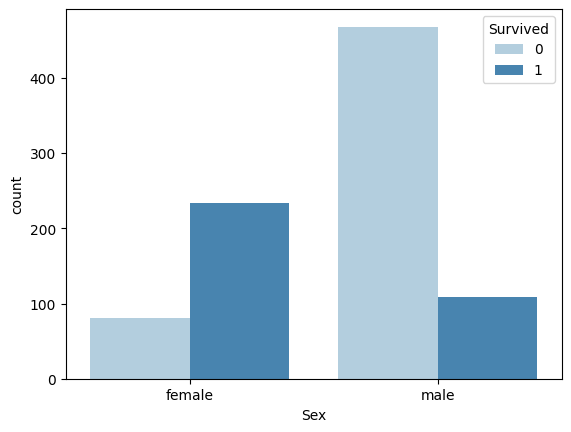

In [441]:
sns.countplot(data=train_df, x="Sex", hue='Survived', palette='Blues');

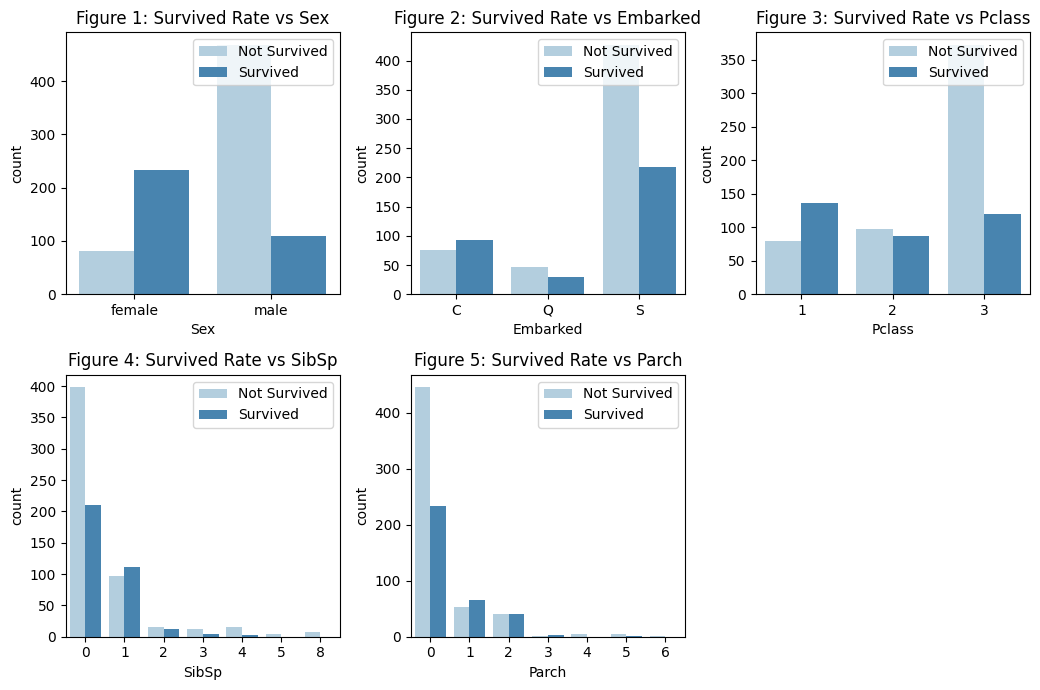

In [442]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
n_rows = 2
n_cols = 3 

fix, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c  #index to loop through list "cols"
        if i < len(cols):
            ax_i = ax[r, c]
            sns.countplot(data=train_df, x=cols[i], hue="Survived", palette="Blues", ax=ax_i)
            ax_i.set_title(f"Figure {i + 1}: Survived Rate vs {cols[i]}")
            ax_i.legend(title="", loc="upper right", labels=["Not Survived", "Survived"])
ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

### Observation: 
- Survival Rate:
    - Fig 1: Female survival rate > Male
    - Fig 2: Most people embarked on Southampton, and also had the highest people not survived
    - Fig 3: 1st class higher survival rate
    - Fig 4: People going with 0 Sibsp are mostly not survived. The number of passenger with 1-2 family members has a better chance of survival
    - Fig 5: people going with 0 Parch are mostly not survived
### 3.2 EDA for Numerical feautures
- Numerical features: {continuous} age, Fare
#### Age

<Axes: xlabel='Age', ylabel='Count'>

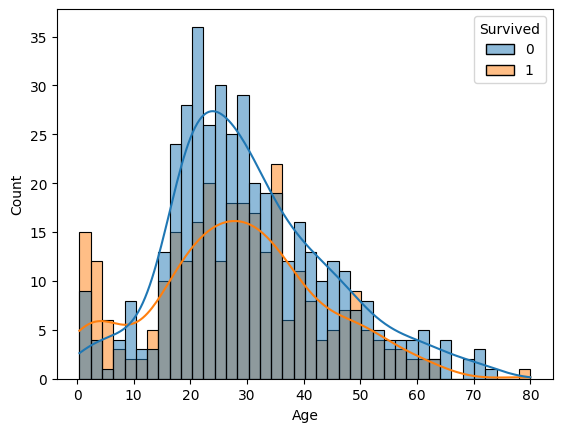

In [443]:
sns.histplot(data=train_df, x='Age', hue='Survived', bins=40, kde=True)

In [444]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

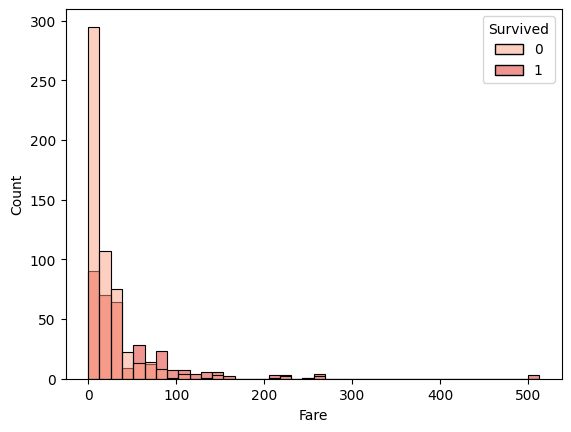

In [445]:
sns.histplot(data=train_df, x='Fare', hue='Survived', bins=40, palette='Reds')

<Axes: xlabel='Fare', ylabel='count'>

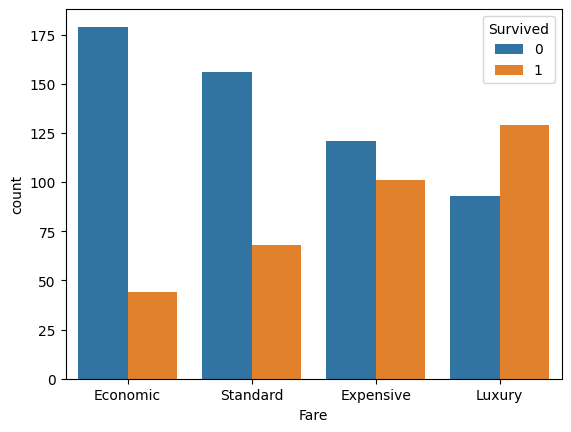

In [446]:
#To name for 0-25% quartile, 25-20, 50-75, 75-100
fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels=fare_categories)
sns.countplot(x=quartile_data, hue=train_df['Survived'])

- Distribution of Fare
    - Fare does not follow a normal distribution and has a huge spike at the price range (0-100$)
    - The distribution is skewed to the left with 75% of the fare paid under 31$ and a max paid fare of $512
-Quartile plot:
    - Passenger with Luxury & Expensive Fare will have more change to survive

## 4. Feature Engineering & Data Wrangling
### Name

In [447]:
train_df['Name'].head(10)

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [448]:
train_df['Name'].tail(10)

PassengerId
882                          Markun, Mr. Johann
883                Dahlberg, Miss. Gerda Ulrika
884               Banfield, Mr. Frederick James
885                      Sutehall, Mr. Henry Jr
886        Rice, Mrs. William (Margaret Norton)
887                       Montvila, Rev. Juozas
888                Graham, Miss. Margaret Edith
889    Johnston, Miss. Catherine Helen "Carrie"
890                       Behr, Mr. Karl Howell
891                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [449]:
import re #regular expression
def extract_title(name): 
    p = re.compile(r", ([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()
train_df['Title']=train_df['Name'].apply(lambda name: extract_title(name))

In [450]:
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [451]:
train_df[train_df['Name'].str.contains('Mrs. Martin')]['Name']

PassengerId
514    Rothschild, Mrs. Martin (Elizabeth L. Barrett)
Name: Name, dtype: object

In [452]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [453]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

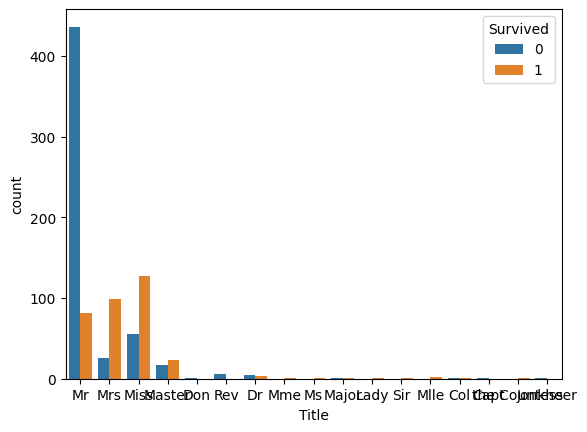

In [454]:
sns.countplot(data=train_df, x='Title', hue='Survived')

In [455]:
def group_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else: 
        return "Others"
train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

In [456]:
train_df['Title'].value_counts()

Title
Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: count, dtype: int64

In [457]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       79
Mrs        72
Master     21
Others      6
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

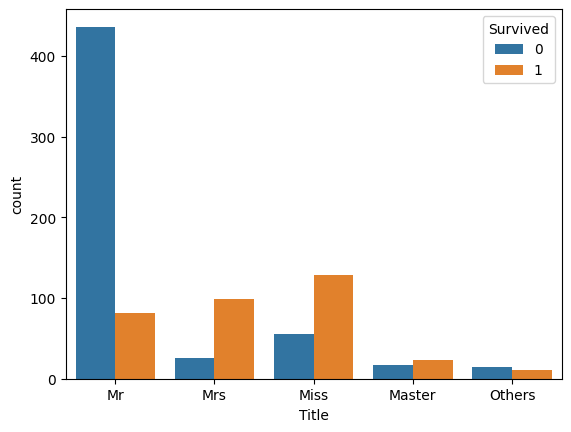

In [458]:
sns.countplot(data=train_df, x='Title', hue='Survived')

# Family
- 'SibSp', 'Parch'

In [459]:
train_df['Family_size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1

In [460]:
test_df['Family_size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [461]:
train_df['Family_cat'] = pd.cut(train_df['Family_size'], bins=[0, 1, 4, 6, 20], labels=['Solo', 'Small', 'Medium', 'Large']) #(0, 1], (1, 4], (4, 6], (6, 20]
test_df['Family_cat'] = pd.cut(test_df['Family_size'], bins=[0, 1, 4, 6, 20], labels=['Solo', 'Small', 'Medium', 'Large']) #(0, 1], (1, 4], (4, 6], (6, 20]

<Axes: xlabel='Family_cat', ylabel='count'>

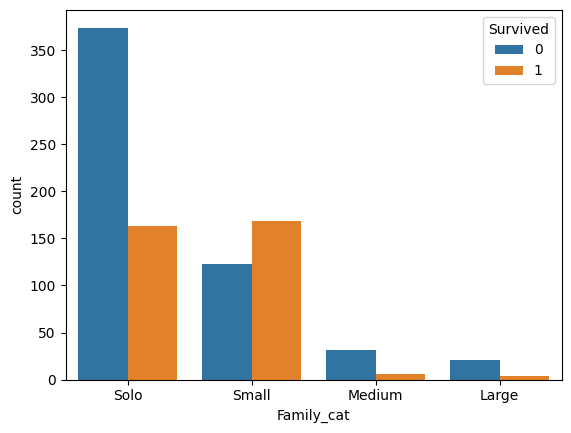

In [462]:
sns.countplot(data=train_df, x='Family_cat', hue='Survived')

## 4.2 Data Wrangling

In [463]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_cat']


In [464]:
def display_missing(df, feature_cols): 
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0: 
            print(f"Col {col} has {missing_count * 100/n_rows:.2f}% missing values.")
            
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Col Age has 19.87% missing values.
Col Embarked has 0.22% missing values.
Col Age has 20.57% missing values.
Col Fare has 0.24% missing values.


### Filling missing values
#### Age 
- Filling missing value with 'median' of whole dataset

In [465]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'])['Age'].median()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24152\1729732706.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'])['Age'].median()


In [466]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [467]:
# Filling the missing values in Age with the medians of Sex and Pclass  groups

train_df['Age'] = train_df['Age'].fillna(train_df.groupby(['Sex', 'Pclass'])['Age'].transform('median'));

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24152\1430587389.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df['Age'] = train_df['Age'].fillna(train_df.groupby(['Sex', 'Pclass'])['Age'].transform('median'));


In [468]:
test_df['Age'] = test_df['Age'].fillna(test_df.groupby(['Sex', 'Pclass'])['Age'].transform('median'))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24152\2493897313.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test_df['Age'] = test_df['Age'].fillna(test_df.groupby(['Sex', 'Pclass'])['Age'].transform('median'))


In [469]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Col Embarked has 0.22% missing values.
Col Fare has 0.24% missing values.


In [470]:
X = train_df[feature_cols]
y = train_df['Survived']

In [471]:
X_test = test_df[feature_cols]


In [472]:
# Preprocess pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
num_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                  ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [473]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [474]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_cat'])])

In [475]:
X = preprocessor.transform(X)   # X -> X_train, X_val

In [476]:
X_test = preprocessor.transform(X_test)

## 5. Model training

In [477]:
from sklearn.model_selection import train_test_split

In [478]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


In [479]:
X_train.shape, X_val.shape

((712, 19), (179, 19))

In [480]:
X_test.shape

(418, 19)

In [481]:
# Binary classification]

from sklearn.preprocessing import PolynomialFeatures
# sklearn model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [482]:
log_reg = LogisticRegression(solver='liblinear', max_iter = 1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [483]:
log_reg.score(X_val, y_val)

0.8715083798882681

In [484]:
y_pred = log_reg.predict(X_val)

In [485]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.863013698630137, 0.8289473684210527)

In [486]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       103
           1       0.86      0.83      0.85        76

    accuracy                           0.87       179
   macro avg       0.87      0.87      0.87       179
weighted avg       0.87      0.87      0.87       179



- y = a*x1 + b*x2 + b -> y = ax1^2 + bx^2 + cx1*x2 + bias

In [487]:
poly = PolynomialFeatures(degree=5)
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.transform(X_val)

In [488]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_features_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [489]:
poly_log_reg.score(poly_features_X_val, y_val)

0.8212290502793296

In [495]:
# Decision tree
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)

In [496]:
decision_tree.score(X_val, y_val)

0.7877094972067039

## 5.1 Cross-validation

In [497]:
from sklearn.model_selection import cross_val_score

In [498]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
dt_cv= DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)

lr_scores = cross_val_score(log_reg_cv, X, y, scoring='accuracy', cv=5)

In [499]:
lr_scores

array([0.83240223, 0.8258427 , 0.79775281, 0.81460674, 0.85955056])

In [500]:
dt_scores = cross_val_score(dt_cv, X, y, scoring='accuracy', cv=5)

In [501]:
dt_scores.mean(), dt_scores.std()

(np.float64(0.8069801016885318), np.float64(0.014586754299604428))

## 5.2 Baseline Model Comparison

In [502]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [503]:
seed = 2023
models = [
    LinearSVC(random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p=2),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed)
]

In [513]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, X, y, metrics, cv=5, plot_results=False):
    # define k-fold:
    kfold = StratifiedKFold(cv, shuffle=True, random_state=seed)
    entries = []
    for model in models: 
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
            
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])
    
    if plot_results: 
        sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
        plt.title("Boxplox of Baseline model Accuracy using 5-Fold cross-validation")
        plt.xticks(rotation=45)
        plt.show()
    # Summary result
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    
    baseline_results = pd.concat([mean, std], axis = 1, ignore_index=True)
    baseline_results.columns = ['Mean', 'Standard Deviation']
    
    #sort by accuracy
    baseline_results.sort_values(by=['Mean'], ascending=False, inplace=True)
    return baseline_results
generate_baseline_results(models, X, y, metrics='accuracy', cv=5, plot_results=False)

,Mean,Standard Deviation
model_name,,
SVC,0.836143,0.031097
LogisticRegression,0.827167,0.028974
LinearSVC,0.826044,0.037442
AdaBoostClassifier,0.824907,0.036325
XGBClassifier,0.818141,0.024013
RandomForestClassifier,0.812529,0.025614
KNeighborsClassifier,0.810301,0.013789
ExtraTreesClassifier,0.799084,0.017734
DecisionTreeClassifier,0.794608,0.016252
